In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import dask.dataframe as dd

from xgboost import plot_importance
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
import pickle
from tqdm import tqdm
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot
from sklearn.metrics import recall_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
import warnings; warnings.simplefilter('ignore')
#from sklearn import grid_search
#from sklearn import svm, grid_search, datasets

#from sklearn.grid_search import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE

In [3]:
import sklearn
print(sklearn.__version__)

0.20.2


In [4]:
%%time

train = pd.read_csv("/home/hybrid/final_dataset.csv",index_col=0,low_memory=False)



CPU times: user 3min 27s, sys: 23.7 s, total: 3min 51s
Wall time: 3min 51s


In [5]:
####total number of bidirectional flows and features
train.shape

(12794627, 84)

(12794627, 84)


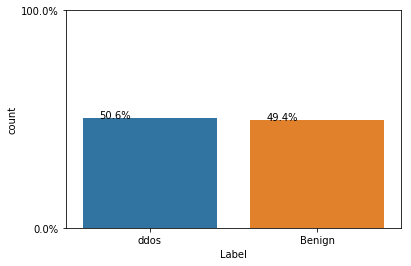

In [10]:
Y=train
#print(Y)
print(Y.shape)
total = len(Y)*1.

ax=sns.countplot(x="Label", data=Y)
for p in ax.patches:
        ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))

#put 11 ticks (therefore 10 steps), from 0 to the total number of rows in the dataframe
ax.yaxis.set_ticks(np.linspace(0, total, 2))

#adjust the ticklabel to the desired format, without changing the position of the ticks. 
ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))
#plt.savefig('foo.png')
plt.show()

In [11]:
pd.set_option('display.max_columns',85)
train.sample(n=5)

,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,Bwd Pkt Len Min,Bwd Pkt Len Mean,Bwd Pkt Len Std,Flow Byts/s,Flow Pkts/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Tot,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Tot,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Len,Bwd Header Len,Fwd Pkts/s,Bwd Pkts/s,Pkt Len Min,Pkt Len Max,Pkt Len Mean,Pkt Len Std,Pkt Len Var,FIN Flag Cnt,SYN Flag Cnt,RST Flag Cnt,PSH Flag Cnt,ACK Flag Cnt,URG Flag Cnt,CWE Flag Count,ECE Flag Cnt,Down/Up Ratio,Pkt Size Avg,Fwd Seg Size Avg,Bwd Seg Size Avg,Fwd Byts/b Avg,Fwd Pkts/b Avg,Fwd Blk Rate Avg,Bwd Byts/b Avg,Bwd Pkts/b Avg,Bwd Blk Rate Avg,Subflow Fwd Pkts,Subflow Fwd Byts,Subflow Bwd Pkts,Subflow Bwd Byts,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
972332,172.31.69.25-18.219.193.20-80-54418-6,18.219.193.20,54418,172.31.69.25,80,6,16/02/2018 11:21:43 PM,4891,1,1,0.0,0.0,0.0,0.0,0.00,0.000000,0.0,0.0,0.0,0.000000,0.0,408.9143324473522,4891.000000,0.000000e+00,4891.0,4891.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.00,0.000000e+00,0.0,0.0,0,0,0,0,32,32,204.457166,204.457166,0.0,0.0,0.000000,0.000000,0.000000,0,0,0,0,1,0,0,0,1.0,0.000000,0.00,0.0,0,0,0,0,0,0,1,0,1,0,-1,225,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ddos
1613782,172.31.0.2-172.31.67.15-53-50955-17,172.31.67.15,50955,172.31.0.2,53,17,20/02/2018 04:52:40,1110,1,1,43.0,71.0,43.0,43.0,43.00,0.000000,71.0,71.0,71.0,0.000000,102702.70270270269,1801.8018018018017,1110.000000,0.000000e+00,1110.0,1110.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.00,0.000000e+00,0.0,0.0,0,0,0,0,8,8,900.900901,900.900901,43.0,71.0,52.333333,16.165808,261.333333,0,0,0,0,0,0,0,0,1.0,78.500000,43.00,71.0,0,0,0,0,0,0,1,43,1,71,-1,-1,0,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
313508,172.31.69.28-18.218.115.60-80-49566-6,18.218.115.60,49566,172.31.69.28,80,6,21/02/2018 11:47:43 PM,19927,2,5,316.0,935.0,316.0,0.0,158.00,223.445743,935.0,0.0,187.0,418.144712,62779.14387514428,351.2821799568425,3321.166667,7.743265e+03,19122.0,4.0,19122.0,19122.000000,0.00000,19122.0,19122.0,19927.0,4981.75,9.601550e+03,19380.0,8.0,0,0,0,0,40,124,100.366337,250.915843,0.0,935.0,156.375000,333.478608,111207.982143,0,1,0,0,0,0,1,1,2.0,178.714286,158.00,187.0,0,0,0,0,0,0,2,316,5,935,-1,219,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ddos
3455883,172.31.69.25-18.219.193.20-80-59868-6,172.31.69.25,80,18.219.193.20,59868,6,16/02/2018 11:27:06 PM,4418077,4,4,935.0,290.0,935.0,0.0,233.75,467.500000,290.0,0.0,72.5,145.000000,277.26995251554007,1.8107425470402616,631153.857143,1.624567e+06,4314301.0,7.0,103768.0,34589.333333,59412.24757,103192.0,22.0,4417494.0,1472498.00,2.461609e+06,4314301.0,248.0,0,0,0,0,136,136,0.905371,0.905371,0.0,935.0,136.111111,314.560982,98948.611111,0,0,0,0,1,0,0,0,1.0,153.125000,233.75,72.5,0,0,0,0,0,0,4,935,4,290,-1,211,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ddos
623595,172.31.69.25-18.219.193.20-80-34736-6,18.219.193.20,34736,172.31.69.25,80,6,16/02/2018 11:19:09 PM,4330,1,1,0.0,0.0,0.0,0.0,0.00,0.000000,0.0,0.0,0.0,0.000000,0.0,461.89376443418024,4330.000000,0.000000e+00,4330.0,4330.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.00,0.000000e+00,0.0,0.0,0,0,0,0,32,32,230.946882,230.946882,0.0,0.0,0.000000,0.000000,0.000000,0,0,0,0,1,0,0,0,1.0,0.000000,0.00,0.0,0,0,0,0,0,0,1,0,1,0,-1,225,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ddos


In [4]:
from sklearn import preprocessing 
for f in train.columns: 
    if train[f].dtype=='object': 
        label = preprocessing.LabelEncoder() 
        label.fit(list(train[f].values)) 
        train[f] = lbl.transform(list(train[f].values))
train.fillna((-999), inplace=True) 
train=np.array(train) 
train = train.astype(float) 

In [5]:
Y = train['Label']
X = train.drop("Label",axis=1)

In [6]:
print(train.shape)
print(X.shape)
print(Y.shape)

(12794627, 84)
(12794627, 83)
(12794627,)


In [7]:
# split data into train and test sets
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

In [8]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(8572400, 83)
(8572400,)
(4222227, 83)
(4222227,)


--------------------------
GRADIENT BOOSTING


In [20]:
%%time
######gradient boosting 
# fit model on training data
model = XGBClassifier(n_jobs=-1)
model.fit(X_train, y_train)

CPU times: user 2h 4min 15s, sys: 10.4 s, total: 2h 4min 26s
Wall time: 5min 52s


In [12]:
print(model)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=-1, nthread=None, objective='binary:logistic',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1)


----------------------------
STOCHASTIC GRADIENT BOOSTING
____________________________

-------Hyper perameter tunning---------------

In [31]:
###finding optimal hyperameters using gridssearch CV

#params = {'subsample': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 1.0],
#          'colsample_bytree': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 1.0], 
#          'colsample_bylevel':[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 1.0]}
para1={'subsample': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 1.0]}  
para2={'colsample_bytree': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 1.0]}
para3={'colsample_bylevel':[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 1.0]}
                

In [29]:
%%time
##### stochastic gradient descent 

model = XGBClassifier(n_jobs=-1)
#params = {'subsample': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 1.0]
#subsample = [0.1, 0.2, 0.3, 0.4, 0.5]
#param_grid = dict(subsample=subsample)         
#Making models with hyper parameters sets
model_t = GridSearchCV(model, param_grid=para1,cv=3,verbose=True)
#Learning
model_t.fit(X_train, y_train)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed: 93.4min finished


CPU times: user 1d 10h 26min 51s, sys: 5min 15s, total: 1d 10h 32min 6s
Wall time: 1h 38min 36s


In [ ]:
#####parameters for 
#subsample  //row samplimg 
#colsample_bytree //Tuning Column Subsampling in XGBoost By Tree
#---> =1 , means all columns are used in each tree 

#colsample_bylevel//Tuning Column Subsampling in XGBoost By Split

In [30]:
print("Best Hyper Parameters:",model_t.best_params_)

Best Hyper Parameters: {'subsample': 0.4}


In [32]:
%%time
##### stochastic gradient descent 

model = XGBClassifier(n_jobs=-1)
model_2 = GridSearchCV(model, param_grid=para2,cv=3,verbose=3)

model_2.fit(X_train, y_train)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] colsample_bytree=0.1 ............................................
[CV] ... colsample_bytree=0.1, score=0.9998089216778356, total= 2.1min
[CV] colsample_bytree=0.1 ............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  2.2min remaining:    0.0s


[CV] .... colsample_bytree=0.1, score=0.999752928030315, total= 2.1min
[CV] colsample_bytree=0.1 ............................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  4.5min remaining:    0.0s


[CV] ... colsample_bytree=0.1, score=0.9997340300811978, total= 2.1min
[CV] colsample_bytree=0.2 ............................................
[CV] ... colsample_bytree=0.2, score=0.9999671037320816, total= 2.4min
[CV] colsample_bytree=0.2 ............................................
[CV] ... colsample_bytree=0.2, score=0.9999786524218828, total= 2.4min
[CV] colsample_bytree=0.2 ............................................
[CV] ... colsample_bytree=0.2, score=0.9999797022956703, total= 2.4min
[CV] colsample_bytree=0.3 ............................................
[CV] ... colsample_bytree=0.3, score=0.9999846017469318, total= 2.7min
[CV] colsample_bytree=0.3 ............................................
[CV] ... colsample_bytree=0.3, score=0.9999856516278228, total= 2.6min
[CV] colsample_bytree=0.3 ............................................
[CV] ... colsample_bytree=0.3, score=0.9999884513061573, total= 2.6min
[CV] colsample_bytree=0.4 ............................................
[CV] .

[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed: 81.5min finished


CPU times: user 22h 32min 43s, sys: 5min 6s, total: 22h 37min 50s
Wall time: 1h 27min 18s


In [33]:
print("Best Hyper Parameters:",model_2.best_params_)

Best Hyper Parameters: {'colsample_bytree': 1.0}


In [34]:
%%time
##### stochastic gradient descent 

model = XGBClassifier(n_jobs=-1)
model_3 = GridSearchCV(model, param_grid=para3,cv=3,verbose=3)

model_3.fit(X_train, y_train)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] colsample_bylevel=0.1 ...........................................
[CV] ... colsample_bylevel=0.1, score=0.999995800476436, total= 3.8min
[CV] colsample_bylevel=0.1 ...........................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  4.0min remaining:    0.0s


[CV] .. colsample_bylevel=0.1, score=0.9999954505161389, total= 3.8min
[CV] colsample_bylevel=0.1 ...........................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  8.0min remaining:    0.0s


[CV] .. colsample_bylevel=0.1, score=0.9999965003958052, total= 3.8min
[CV] colsample_bylevel=0.2 ...........................................
[CV] ... colsample_bylevel=0.2, score=0.999995800476436, total= 3.8min
[CV] colsample_bylevel=0.2 ...........................................
[CV] .. colsample_bylevel=0.2, score=0.9999954505161389, total= 3.8min
[CV] colsample_bylevel=0.2 ...........................................
[CV] .. colsample_bylevel=0.2, score=0.9999965003958052, total= 3.8min
[CV] colsample_bylevel=0.3 ...........................................
[CV] ... colsample_bylevel=0.3, score=0.999995800476436, total= 3.8min
[CV] colsample_bylevel=0.3 ...........................................
[CV] .. colsample_bylevel=0.3, score=0.9999954505161389, total= 3.8min
[CV] colsample_bylevel=0.3 ...........................................
[CV] .. colsample_bylevel=0.3, score=0.9999965003958052, total= 3.7min
[CV] colsample_bylevel=0.4 ...........................................
[CV] .

[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed: 105.6min finished


CPU times: user 1d 12h 34min 30s, sys: 11min 50s, total: 1d 12h 46min 20s
Wall time: 1h 51min 34s


In [35]:
print("Best Hyper Parameters:",model_3.best_params_)

Best Hyper Parameters: {'colsample_bylevel': 0.1}


In [11]:
n_estimators = [100, 200, 300, 400, 500]
learning_rate = [0.0001, 0.001, 0.01, 0.1,0.2]
para4={'n_estimators': [100, 200, 300, 400, 500]}  
para5={'learning_rate': [0.0001, 0.001, 0.01, 0.1,0.2]}

In [15]:
model = XGBClassifier(n_jobs=-1)
model_4 = GridSearchCV(model, param_grid=para5,cv=3,verbose=3,scoring='accuracy')

model_4.fit(X_train, y_train)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] learning_rate=0.0001 ............................................
[CV] ... learning_rate=0.0001, score=0.9949941679116504, total= 3.9min
[CV] learning_rate=0.0001 ............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  4.0min remaining:    0.0s


[CV] ... learning_rate=0.0001, score=0.9950571607651112, total= 3.9min
[CV] learning_rate=0.0001 ............................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  8.1min remaining:    0.0s


[CV] ... learning_rate=0.0001, score=0.9950540093915378, total= 4.0min
[CV] learning_rate=0.001 .............................................
[CV] .... learning_rate=0.001, score=0.9949941679116504, total= 3.8min
[CV] learning_rate=0.001 .............................................
[CV] .... learning_rate=0.001, score=0.9950571607651112, total= 3.9min
[CV] learning_rate=0.001 .............................................
[CV] .... learning_rate=0.001, score=0.9950540093915378, total= 3.8min
[CV] learning_rate=0.01 ..............................................
[CV] ..... learning_rate=0.01, score=0.9949941679116504, total= 3.8min
[CV] learning_rate=0.01 ..............................................
[CV] ..... learning_rate=0.01, score=0.9950571607651112, total= 3.8min
[CV] learning_rate=0.01 ..............................................
[CV] ..... learning_rate=0.01, score=0.9950540093915378, total= 3.9min
[CV] learning_rate=0.1 ...............................................
[CV] .

[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed: 59.8min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=-1, nthread=None, objective='binary:logistic',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'learning_rate': [0.0001, 0.001, 0.01, 0.1, 0.2]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=3)

In [18]:
print("Best Hyper Parameters:",model_4.best_params_)

Best Hyper Parameters: {'learning_rate': 0.2}


In [12]:
model = XGBClassifier(n_jobs=-1)
model_5 = GridSearchCV(model, param_grid=para4,cv=3,verbose=3,scoring='accuracy')

model_5.fit(X_train, y_train)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] n_estimators=100 ................................................
[CV] ........ n_estimators=100, score=0.999995800476436, total= 3.9min
[CV] n_estimators=100 ................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  4.0min remaining:    0.0s


[CV] ....... n_estimators=100, score=0.9999954505161389, total= 3.8min
[CV] n_estimators=100 ................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  8.0min remaining:    0.0s


[CV] ....... n_estimators=100, score=0.9999965003958052, total= 3.8min
[CV] n_estimators=200 ................................................
[CV] ........ n_estimators=200, score=0.999999300079406, total= 7.2min
[CV] n_estimators=200 ................................................
[CV] ...................... n_estimators=200, score=1.0, total= 7.3min
[CV] n_estimators=200 ................................................
[CV] ...................... n_estimators=200, score=1.0, total= 7.1min
[CV] n_estimators=300 ................................................
[CV] ........ n_estimators=300, score=0.999999650039703, total=10.4min
[CV] n_estimators=300 ................................................
[CV] ...................... n_estimators=300, score=1.0, total=10.6min
[CV] n_estimators=300 ................................................
[CV] ...................... n_estimators=300, score=1.0, total=10.4min
[CV] n_estimators=400 ................................................
[CV] .

[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed: 154.3min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=-1, nthread=None, objective='binary:logistic',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [100, 200, 300, 400, 500]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=3)

In [14]:
print("Best Hyper Parameters:",model_5.best_params_)

Best Hyper Parameters: {'n_estimators': 300}


In [ ]:

####hyperperameters found by GRODSERCH CV
'subsample': 0.4
'colsample_bytree': 1.0
'colsample_bylevel': 0.1
 'n_estimators':300   
    
#######################################    

##########Running Final TUNED MODEL####################

In [9]:
%%time
model =XGBClassifier(max_depth=5,learning_rate=0.2,subsample=0.4,colsample_bytree=1.0,colsample_bylevel=0.1,n_estimators=200,n_jobs=-1)
model.fit(X_train, y_train)

CPU times: user 4h 39min 24s, sys: 10.8 s, total: 4h 39min 34s
Wall time: 11min 51s


In [11]:
y_pred = model.predict(X_test)

In [12]:
accuracy = accuracy_score(y_test, y_pred)
print("accuracy:",accuracy)
f1score=f1_score(y_test, y_pred)
print("f1-acore:",f1score)
cm=confusion_matrix(y_test, y_pred)
print("confusion matrix:\n",cm)
pr=precision_score(y_test,y_pred)
print("Precision:",pr)
rs=recall_score(y_test,y_pred)
print("Recall_score:",rs)
misclassified_samples = X_test[y_test != y_pred]
mc=misclassified_samples.shape[0]
print("Misclassified :",mc)

accuracy: 1.0
f1-acore: 1.0
confusion matrix:
 [[2086461       0]
 [      0 2135766]]
Precision: 1.0
Recall_score: 1.0
Misclassified : 0


######ROC CURVE########

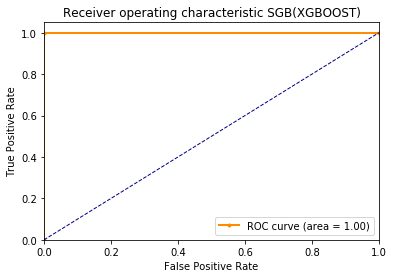

In [13]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_pred, y_test)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc, marker='.')
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic SGB(XGBOOST)')
plt.legend(loc="lower right")
plt.show()

#####Feature Importance






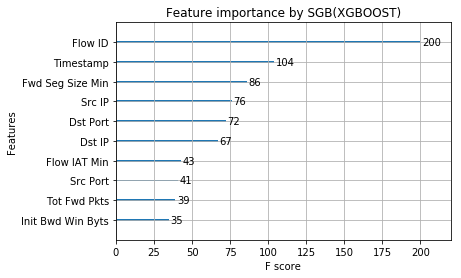

In [15]:
from xgboost import plot_importance
#plot_importance(model,max_num_features=15,)
#plot_importance(model)
plot_importance(model, ax=None, height=0.1, xlim=None, ylim=None, title='Feature importance by SGB(XGBOOST)', xlabel='F score', ylabel='Features', importance_type='weight', max_num_features=10, grid=True,)
pyplot.show()